# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION

### Dataset Description 

**This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue**.

**Description of Columns**
<ul>
    <li>1. id - Index ID of Movies</li>
    <li>2. imdb_id - IMBD Movie ID</li>
    <li>3. popularity - Popularity of the movie</li>
    <li>4. budget - Budget of the Movie</li> 
    <li>5. revenue - Revenue generated from the movie </li>
    <li>6. original_title - Movie title</li>
    <li>7. cast - Mames of the Movie casts</li>
    <li>8. homepage - URL to the Movie</li> 
    <li>9. director - Name the Movie Director</li>
    <li>10. tagline - Movie's Tagline</li> 
    <li>11. keywords - Keywords from the Movie's Tagline</li>
    <li>12. overview - A sentence summary of the Movie</li>
    <li>13. runtime - Movie Duration</li> 
    <li>14. genres - Genres of the Movie</li> 
    <li>15. production_companies - Production Companies of the movie</li> 
    <li>16. release_date - Date on which the movie was released</li> 
    <li>17. vote_count - Vote count for the movie</li> 
    <li>18. vote_average - Rating of the Movie</li>
    <li>19. release_year - Release year of the movie</li>  
    <li>20. budget_adj - Adjusted budget due to 2010 inflation</li>
    <li>21. revenue_adj - Adjusted revenue due to 2010 inflation</li>
</ul>


### Questions for the Analysis
<ol>
    <li><a href="#qtn1">Which directors have the most movies?</a></li>
    <li><a href="#qtn2">Which are the popular genres over the years?</a></li>
    <li><a href="#qtn3">Which movies genereated the highest/lowest profit?</a></li>
    <li><a href="#qtn4">What is the trends of movie runtime over the the decades?</a></li>
</ol>

### Importing of neccessary libraries and modules


In [1]:
#Importing of the various libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## DATA WRANGLING

> This section involes loading the data, checking for cleanliness, and then triming and cleaning the dataset for analysis.


## General Properties of TMDb Movie Dataset

In [2]:
# Loading the dataset
movie_df = pd.read_csv('tmdb-movies.csv')

#Showing first 5 data in the dataset
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Showing last 5 data in the dataset
movie_df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


## Further Details of the dataset

In [4]:
#Showing the dimensions of the dataset
movie_df.shape

(10866, 21)

### The above info shows that there are 10866 movie entries and 21 column headers in the dataset

In [5]:
#Showing the general info of the dataset
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### The above details show that some of the columns contains missing/null values. This would be inportant at the cleaning section. 

In [6]:
movie_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

### This output shows the datatypes of the various column heads. This is important to know because the `release_year` for instance is an integer instead of being a date datatype.

In [7]:
#Summary of the various column values
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### From the above output, some columns like `budget`, `revenue`, and `runtime` have minimum values as 0. Concentration is going to be on `runtime` because according to TMDB, a film must be at 40 minutes and above. So, the analysis would be basing on movies having 40 minutes and above runtime. For the other columns, since the data source has no explicit explanation of the 0 values, those values would be maintained throughout the analysis.


## Data Cleaning
> The neccessary Data Cleanings would be done in this section
 

## Working with movies with 40 minutes and above ONLY

In [10]:
#Checking for movies runtime summary
movie_df['runtime'].describe()

count    10616.000000
mean       104.192163
std         28.461343
min         40.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [9]:
# Cleaning off movies less than 40 minutes runtime
movie_df = movie_df[movie_df['runtime'] >=40]

#Confirming cleaning
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10616.000000,10616.000000,1.061600e+04,1.061600e+04,10616.000000,10616.000000,10616.000000,10616.000000,1.061600e+04,1.061600e+04
mean,64949.585343,0.653229,1.496197e+07,4.075916e+07,104.192163,221.313866,5.959250,2001.222777,1.795499e+07,5.256963e+07
std,91375.889260,1.006607,3.119092e+07,1.182122e+08,28.461343,581.676257,0.930531,12.822937,3.459987e+07,1.461091e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,40.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10517.000000,0.210612,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,20072.000000,0.386508,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,73454.500000,0.721812,1.600000e+07,2.557345e+07,112.000000,149.250000,6.600000,2011.000000,2.163338e+07,3.560230e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### The `runtime` column now has a minimum of 40 minutes

### Since the analysis would involve profit, there is the need to calculate profit using the original `budget` and `revenue` columns.

In [11]:
#Defining a 'Profit' column
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']

#Confirming 'profit' column has been added
movie_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354


<a id='eda'></a>
## EXPLORATORY DATA ANALYSIS

**It is time to answer the questions for the analysis**

<a id='qtn1'></a>
## Research Question 1: Which directors have the most/least movies?

In [12]:
# Displaying the top 10 Directors with the most movies directed
movie_df['director'].value_counts().head(10)


Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      27
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

### The details above shows the top 10 Directos with their movie count. It shows that Woody Allen tops with 45 movies

### This can further be visualized on a bar graph.

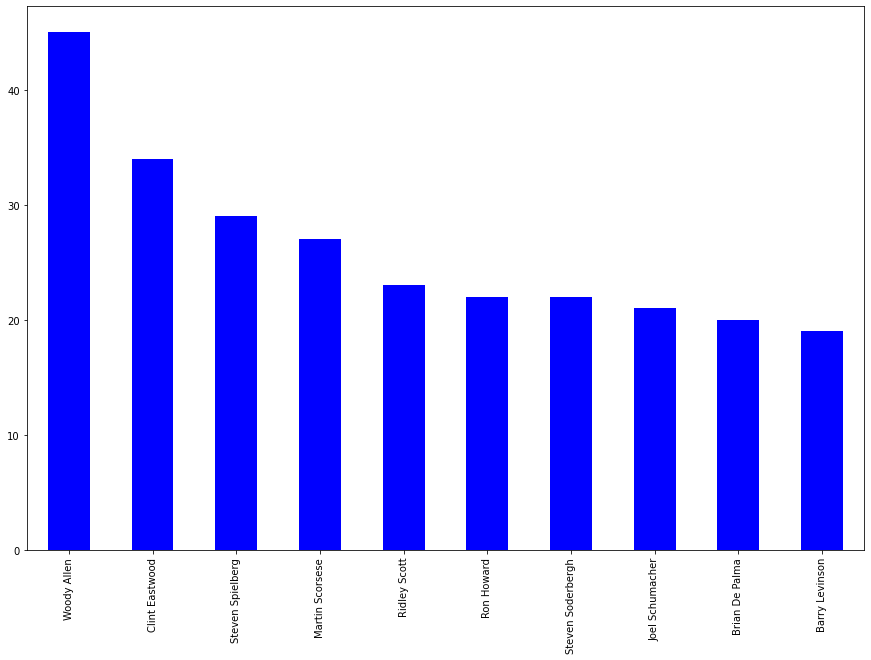

In [13]:
#A Bar graph showing the top 10 Directors with the most movies directed
movie_df['director'].value_counts().head(10).plot.bar(figsize = (15,10), color = 'Blue')
plt.show()

In [14]:
# Displaying the lowest 10 Directors with the least movies directed
movie_df['director'].value_counts().tail(10)

David Campbell                                1
Giacomo Campiotti                             1
Jordan Rubin                                  1
James T. Walker                               1
Cess Silvera|Adam Doench|Lyndale V. Pettus    1
Peter Care                                    1
Tuck Tucker                                   1
David Jung                                    1
Michael Kalesniko                             1
Harold P. Warren                              1
Name: director, dtype: int64

### From the Bar graph and the cells above, Woody Allen has the highest movies directed of 45 while directors like David Campbell, Harold P. Warren among others have just 1 movie directed.

<a id='qtn2'></a>
## Research Question 2 : Which are the popular genres over the years?

### To get the genres from the `genres` column, the values need to be separated

In [15]:
#Getting the genres of the movies from the 'genres' column
genre = movie_df['genres'].str.get_dummies(sep = '|')
movie_genre = genre.sum().reset_index()

#Confirming the movie genres
movie_genre

,index,0
0,Action,2343
1,Adventure,1444
2,Animation,550
3,Comedy,3705
4,Crime,1350
5,Documentary,511
6,Drama,4730
7,Family,1153
8,Fantasy,880
9,Foreign,186


### The above details show the various movie genre and their total value. ***Drama*** tops all with ***Western*** being the least popular genre.


### This can be further visualized in the following.


### Since I would be plotting a barplot for most of the remaining data, it would be good to define a function that can be used throughout the remaining analysis.

In [19]:
# Defining a 'plot_bar' function.
def plot_bar(x, y, data, title = " ", xlabel = " ", ylabel = " ", rotation = 90):
    plt.figure(figsize = (15, 10))
    bar_list = sns.barplot(x=x, y=y,)
    plt.title(title, fontsize = 20)
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.xticks(rotation = 90)
    
    return plt.show()

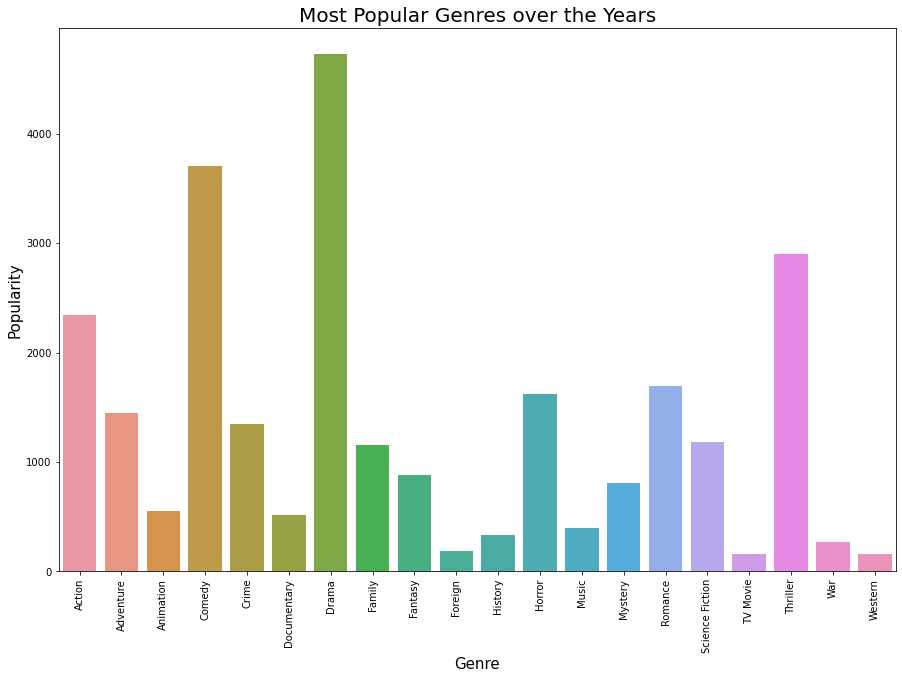

In [29]:
#Visualizing the most popular genres by ploting a barplot
plot_bar(genre.columns, genre.sum(), movie_genre, "Most Popular Genres over the Years", "Genre", "Popularity");

### From the bar graph above, it shows that ***Drama***, ***Comedy***, ***Thiller*** and ***Action*** movies are the first four most popular movie genres overs the years.

<a id='qtn3'></a>
## Research Question 3 : Which movies genereated the highest/lowest profit?

### From the profit column created during the Data Cleaning section, it would be easy to calculate and visualize the highest and the lowest profit.

In [21]:
#Finding the highest profit movie
high_profit_movie = [movie_df.original_title[movie_df['profit']== movie_df['profit'].max()], (movie_df.profit[movie_df['profit']== movie_df['profit'].max()])]
high_profit_movie

[1386    Avatar
 Name: original_title, dtype: object,
 1386    2544505847
 Name: profit, dtype: int64]

### The movie that made the highest profit is ***Avatar*** .

In [22]:
#Finding the lowest profit movie
low_profit_movie = [movie_df.original_title[movie_df['profit']== movie_df['profit'].min()], (movie_df.profit[movie_df['profit']== movie_df['profit'].min()])]
low_profit_movie

[2244    The Warrior's Way
 Name: original_title, dtype: object,
 2244   -413912431
 Name: profit, dtype: int64]

### The movie that made the huge loss is ***The Warrior's Way*** .


### This can be visualized in the following

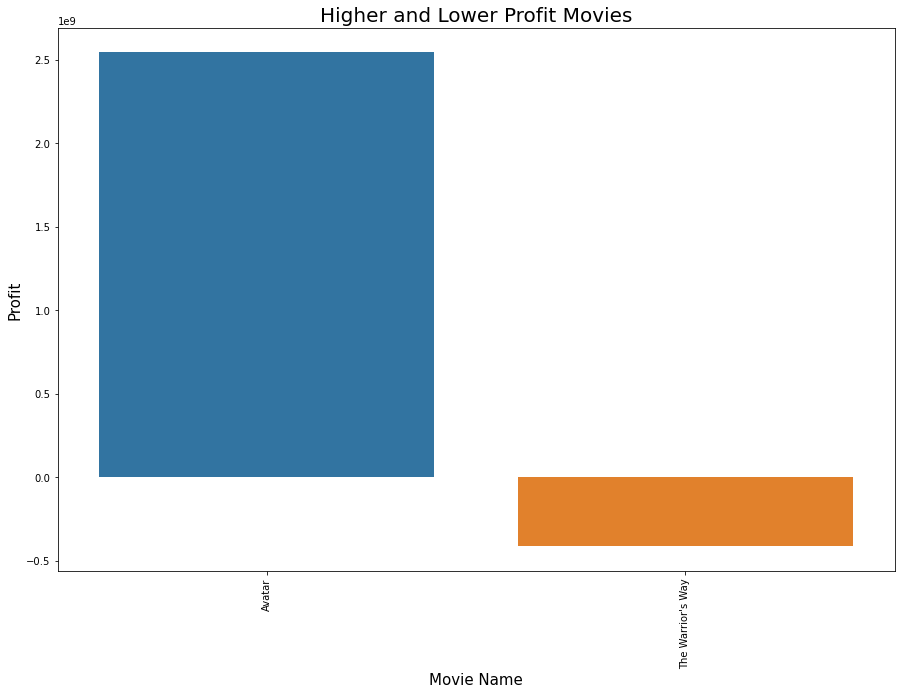

In [30]:
#Visualizing the highest and lowest profit movies by plotting a barplot
df_profit = movie_df[(movie_df.profit == movie_df['profit'].max()) | (movie_df.profit == movie_df['profit'].min())]
plot_bar(df_profit['original_title'], df_profit['profit'], df_profit, "Higher and Lower Profit Movies", "Movie Name", "Profit")

### From the barplot above, ***Avatar*** shows to have the highest profit while ***The Warrior's Way*** made the lowest profit.

### The followings further analyze the top 10 most profitable movies over the time.

In [26]:
#Finding the top 10 profitable movies
top10_profit_movies = movie_df[['original_title', 'profit']].sort_values('profit', ascending = False).head(10)
top10_profit_movies

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188
0,Jurassic World,1363528810
4,Furious 7,1316249360
4361,The Avengers,1299557910
3374,Harry Potter and the Deathly Hallows: Part 2,1202817822
14,Avengers: Age of Ultron,1125035767
5422,Frozen,1124219009
8094,The Net,1084279658


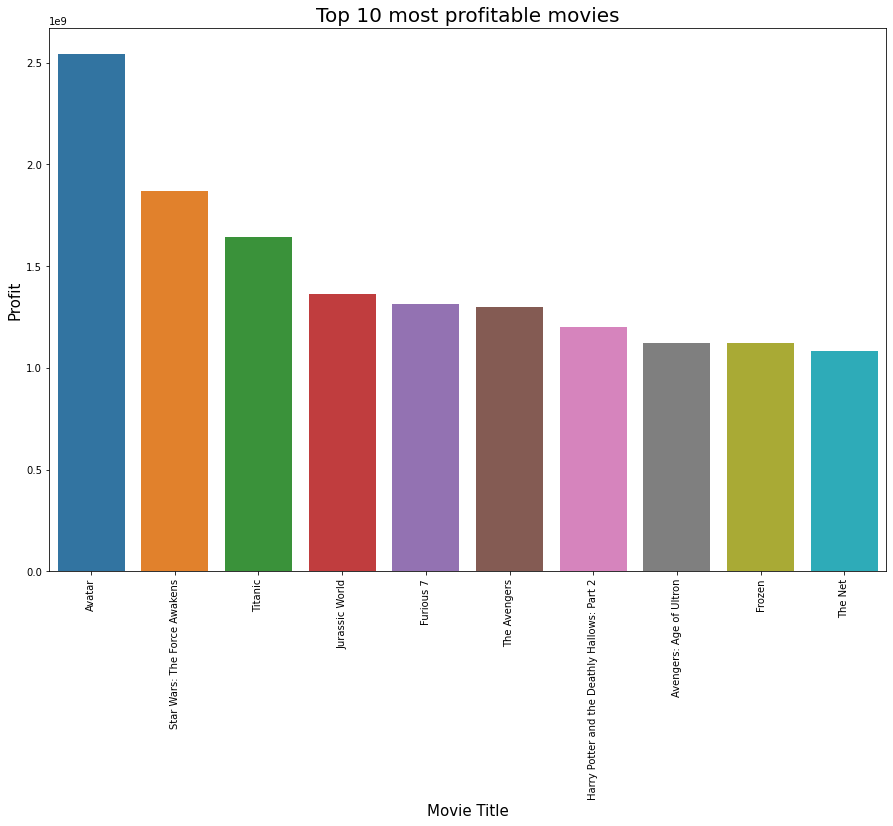

In [31]:
#Visualizing the top 10 highest profitable movies by plotting a barplot.
plot_bar(top10_profit_movies['original_title'], top10_profit_movies['profit'], top10_profit_movies, "Top 10 most profitable movies", "Movie Title", "Profit")

### The barplot above shows the top 10 most profitable movies over the given period in the dataset. ***Avatar***, ***Star Wars: The Force Awakens*** and ***Titanic*** tops the list of most profitable movies. 

<a id='qtn4'></a>
## Research Question 4 : What is the trends of movie runtime over the the decades??

### From the `runtime` data cleaned from the Data Cleaning section, movie runtime over the decade can be analyzed now.


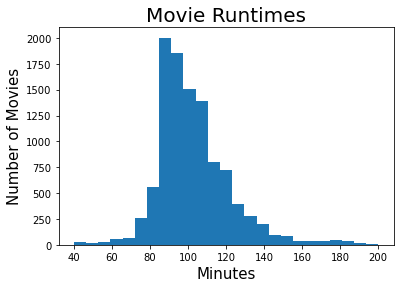

In [32]:
#Plotting a Histogram to show Movie Runtimes
plt.hist(movie_df['runtime'], range = (40, 200), bins = 25)
plt.title('Movie Runtimes', fontsize = 20)
plt.xlabel('Minutes', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)
plt.show()

### From the Histogram above, it can be seen that a high number of movies ranges between 90 to 120 minutes.

In [33]:
# Finding out the year in which the highest runtime movie was released.
movie_df.loc[:,['runtime', 'release_year']].max()

runtime          900
release_year    2015
dtype: int64

In [34]:
# Finding out the year in which the lowest runtime movie was released.
movie_df.loc[:,['runtime', 'release_year']].min()

runtime           40
release_year    1960
dtype: int64

### From the above two cells, the longest movie runtime seem to be in recent time, 2015 while the shortest movie was in 1960.

### To further understand the trend of movie runtime over the years in order to know whether recent movies are getting longer, the following analysis is done.

In [35]:
#Defining Movies by decade
movies_by_decades = movie_df.copy()
movies_by_decades['release_year'] = ((movies_by_decades['release_year'] // 10) * 10).astype('int64')

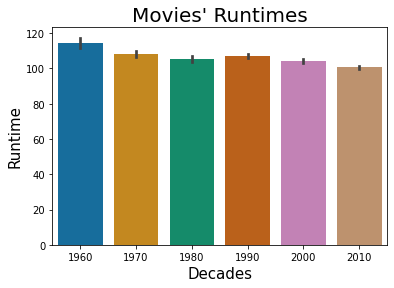

In [36]:
#Plotting a boxplot to show decade trends in movie runtime
sns.barplot(x = 'release_year', y = 'runtime', data = movies_by_decades, palette = 'colorblind')
plt.title('Movies\' Runtimes', fontsize = 20)
plt.xlabel('Decades', fontsize = 15)
plt.ylabel('Runtime', fontsize = 15)
plt.show()

### From the barplot above, since there is no much differences in the boxes, this means there is no much change in the runtime of movies over the given decades. Just that movies in the ***1960s*** seem to have higher runtime while movies within the 2010s are not being that long.

<a id='conclusions'></a>
## CONCLUSION

### From the analysis done:
<ol>
    <li>Woody Allen has the highest movies directed of 45 while directors like David Campbell, Harold P. Warren among others have just 1 movie directed.</li>
    <li>Drama, Comedy, Thiller and Action movies are the first four most popular movie genres overs the years.</li>
    <li>Avatar, Star Wars: The Force Awakens and Titanic tops the list of most profitable movies.</li>
    <li>Movies in the 1960s seem to have higher runtime while movies within the 2010s are not being that long.</li>
</ol>


## LIMITATIONS
<ol>
    <li>Analysis was not done on the casts because when the Data Cleaning was done, some of the outputs cannot be used for analysis.<p><img src = "cast-output.PNG"></p></li>
    <li>Columns such as `homepage`, `tagline`, `keywords` and `production_companies` have far more null values to be used for any substantive analysis</li>
    <li>Researches on `vote_count` and `vote_average` columns did not produce anything interesting to use for the analysis</li>
    <li>The dataset was limited to movies between 1960 to 2015 while it is 2022.</li>
</ol>

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

<a id='references'></a>
## REFERENCES
<ol>
    <li><a href="https://www.youtube.com/watch?v=DNIbDfrtM1g&t=1s">Exploratory Data Analysis on TMDb Movie Dataset</a></li>
    
</ol>
